In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)

In [2]:
data = pd.read_csv('german_credit_data.csv')

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## EDA & Preprocessing

In [6]:
data['Unnamed: 0'].nunique()

1000

In [7]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [10]:
data_eda = data.dropna()

In [11]:
data_eda.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [12]:
corr = data_eda.corr()

In [13]:
mask = np.triu(np.ones_like(corr, dtype=bool))

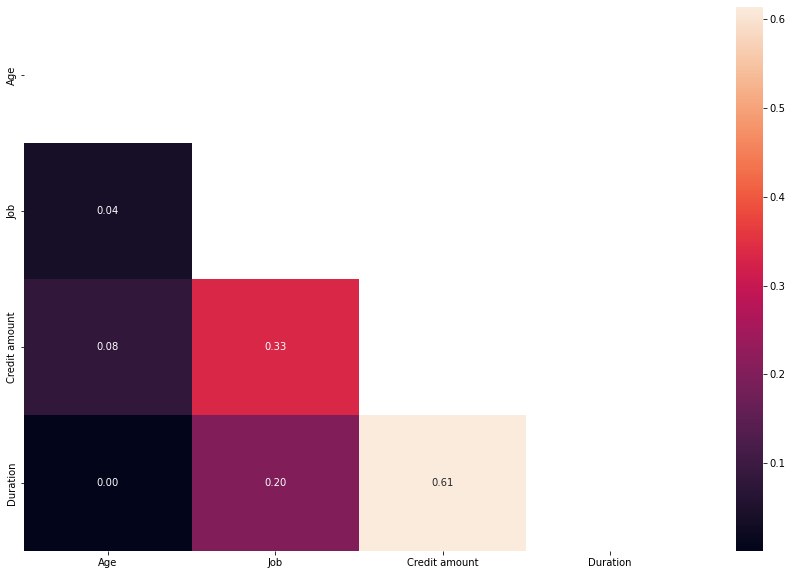

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

### Преобразуем все признаки в числовые подходящими методами

In [16]:
labelencoder = LabelEncoder()
columns=['Sex','Housing','Saving accounts','Saving accounts','Checking account','Purpose']
for col in columns:
    data_eda[col] = labelencoder.fit_transform(data_eda[col])
    data_eda[col].replace('', np.nan, inplace=True)
    data_eda.dropna(subset=[col], inplace=True)

In [17]:
data_eda

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1
...,...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24,5
993,30,1,3,1,0,0,3959,36,4
996,40,1,3,1,0,0,3857,30,1
998,23,1,2,0,0,0,1845,45,5


### Нормализация¶

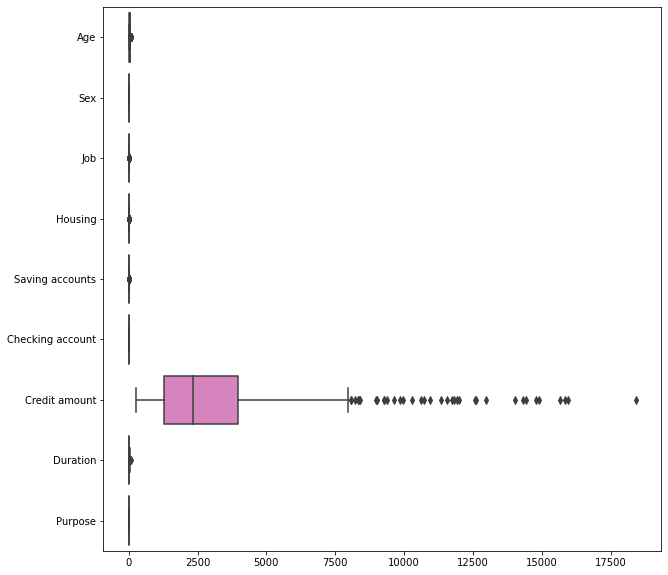

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_eda, orient='h');

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_eda)
data_scaled = pd.DataFrame(X_scaled, columns=data_eda.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.053571,0.0,0.666667,0.5,0.0,0.5,0.312707,0.636364,0.714286
1,0.464286,1.0,0.666667,0.0,0.0,0.0,0.419110,0.545455,0.571429
2,0.607143,1.0,0.666667,0.0,0.0,0.0,0.253141,0.272727,0.142857
3,0.285714,1.0,1.000000,1.0,0.0,0.5,0.367644,0.454545,0.142857
4,0.160714,1.0,1.000000,0.5,0.0,0.5,0.273198,0.363636,0.142857


<AxesSubplot:>

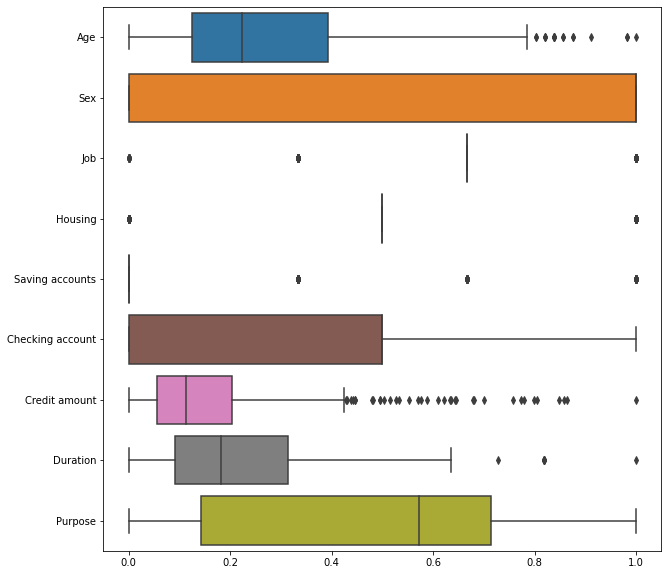

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_scaled, orient='h')

### Снижение размерности 

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)
print(X_scaled.shape)
X_tsne = tsne.fit_transform(X_scaled)
print(X_tsne.shape)

(522, 9)
(522, 2)


<AxesSubplot:>

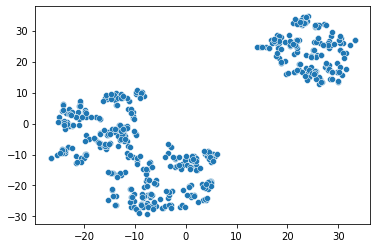

In [22]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1])

### Кластеризация

### Понижение размерности

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)
print(X_scaled.shape)
X_tsne = tsne.fit_transform(X_scaled)
print(X_tsne.shape)

(522, 9)
(522, 2)


### AgglomerativeClustering

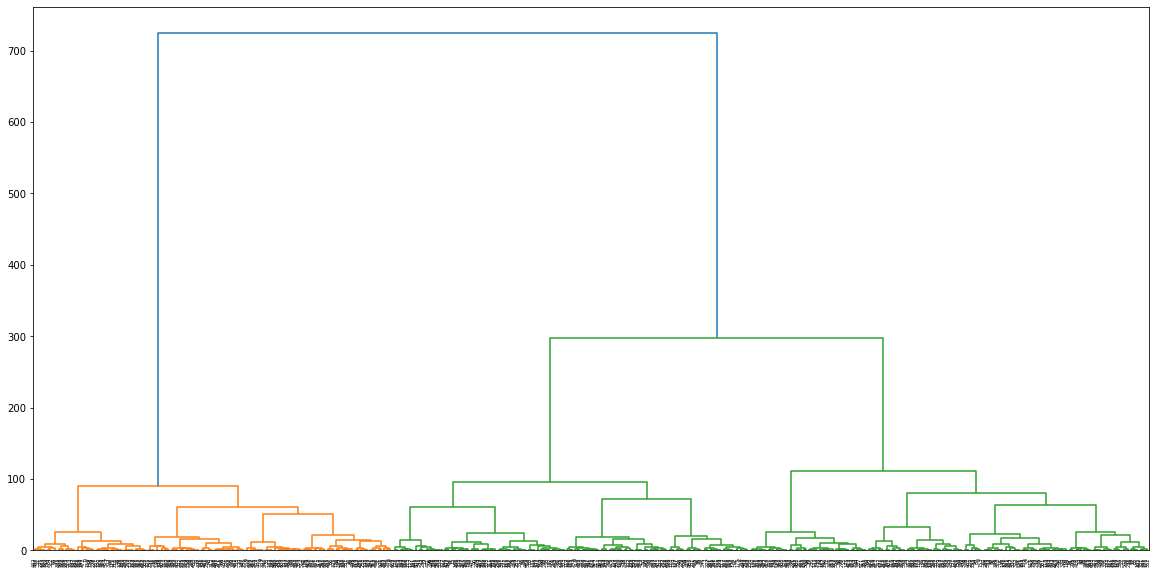

In [24]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_tsne, method='ward')
dendrogram_ = dendrogram(linkage_)

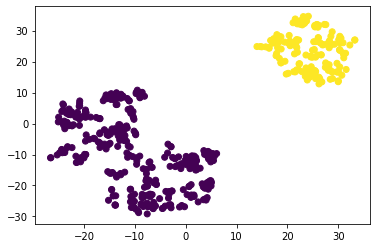

In [25]:
agg = AgglomerativeClustering(n_clusters=2).fit(X_tsne)
labels = agg.labels_

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

### Silhouette plot

In [26]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 124.65it/s]


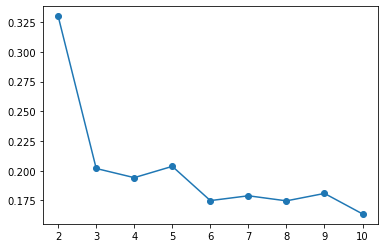

In [27]:
plt.plot(range(2,11), silhouette, marker='o');

In [28]:
agg = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
labels = agg.labels_

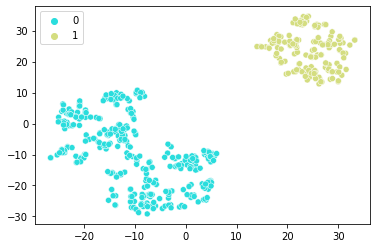

In [29]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [30]:
data_eda['labels'] = labels

In [31]:
data_eda['labels'].value_counts(normalize=True)

0    0.678161
1    0.321839
Name: labels, dtype: float64

In [32]:
data_eda.groupby('labels').median().T.round(2)

labels,0,1
Age,33.0,28.0
Sex,1.0,0.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Checking account,1.0,1.0
Credit amount,2452.0,1959.0
Duration,18.0,18.0
Purpose,3.0,4.0


### DBSCAN

In [33]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████████████████████████████████████| 90/90 [00:00<00:00, 116.53it/s]


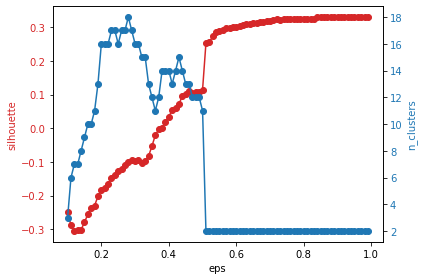

In [34]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|██████████████████████████████████████████| 31/31 [00:00<00:00, 114.47it/s]


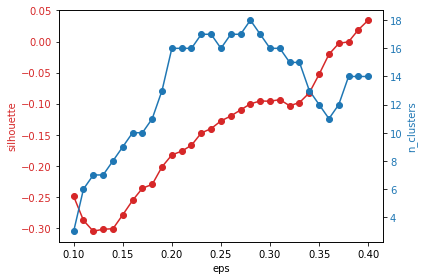

In [35]:
eps_range = np.arange(0.1,0.4,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 93.06it/s]


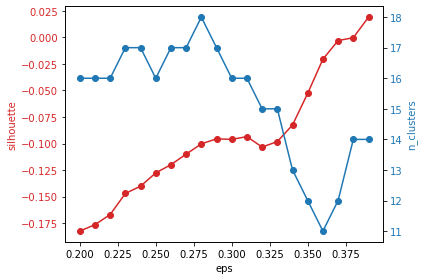

In [36]:
eps_range = np.arange(0.2,0.4,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 60.28it/s]


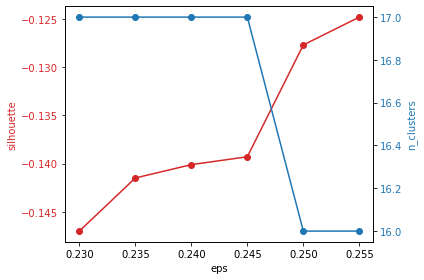

In [37]:
eps_range = np.arange(0.23,0.26,0.005)
dbscan_clustering(eps_range, X_scaled)

In [38]:
dbscan = DBSCAN(eps=0.125).fit(X_scaled)
labels = dbscan.labels_

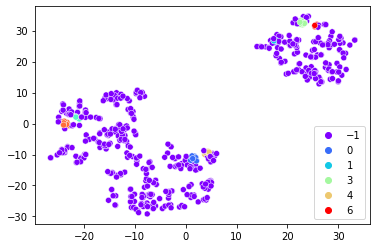

In [39]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [40]:
data_eda['labels'] = labels
data_eda['labels'].value_counts(normalize=True)

-1    0.909962
 0    0.017241
 3    0.017241
 5    0.015326
 4    0.011494
 6    0.009579
 1    0.009579
 2    0.009579
Name: labels, dtype: float64

In [41]:
data_eda.groupby('labels').median().T.round(2)

labels,-1,0,1,2,3,4,5,6
Age,32.0,29.0,25.0,35.0,22.0,26.0,40.0,23.0
Sex,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
Job,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
Housing,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
Saving accounts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Checking account,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Credit amount,2439.0,1245.0,3190.0,1372.0,1858.0,745.5,1766.0,1403.0
Duration,18.0,9.0,18.0,12.0,18.0,9.5,9.5,18.0
Purpose,3.0,5.0,5.0,1.0,4.0,5.0,1.0,1.0


In [45]:
X_scaled

array([[0.05357143, 0.        , 0.66666667, ..., 0.31270663, 0.63636364,
        0.71428571],
       [0.46428571, 1.        , 0.66666667, ..., 0.41910954, 0.54545455,
        0.57142857],
       [0.60714286, 1.        , 0.66666667, ..., 0.25314084, 0.27272727,
        0.14285714],
       ...,
       [0.375     , 1.        , 1.        , ..., 0.19732202, 0.36363636,
        0.14285714],
       [0.07142857, 1.        , 0.66666667, ..., 0.08645581, 0.59090909,
        0.71428571],
       [0.14285714, 1.        , 0.66666667, ..., 0.23694071, 0.59090909,
        0.14285714]])

In [42]:
data_eda.drop(['labels'], axis=1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1
...,...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24,5
993,30,1,3,1,0,0,3959,36,4
996,40,1,3,1,0,0,3857,30,1
998,23,1,2,0,0,0,1845,45,5


### KNeighborsClassifier

[[ 2.45004252e-01 -7.77156117e-16  6.01190476e-01  6.19047619e-01
   1.23015873e-01  3.30357143e-01  1.46638879e-01  2.10858586e-01
   4.51530612e-01]
 [ 3.02108555e-01  1.00000000e+00  6.36534840e-01  5.04237288e-01
   1.10169492e-01  3.09322034e-01  1.74390199e-01  2.42638247e-01
   3.92655367e-01]]


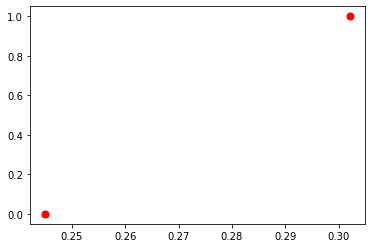

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


  
kmeans = KMeans(n_clusters=2).fit(X_scaled)
centroids = kmeans.cluster_centers_
print(centroids)


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()